# FRIENDS OF TRACKING
## Lesson 4 Homework

The following is the code of the homework given in Lesson 4 revolving around Tracking data.

Special Thanks to Laurie for giving me my first taste of tracking Data. Also, thanks to Metrica Sports for providing with the sample dataset.

The Questions are given below.

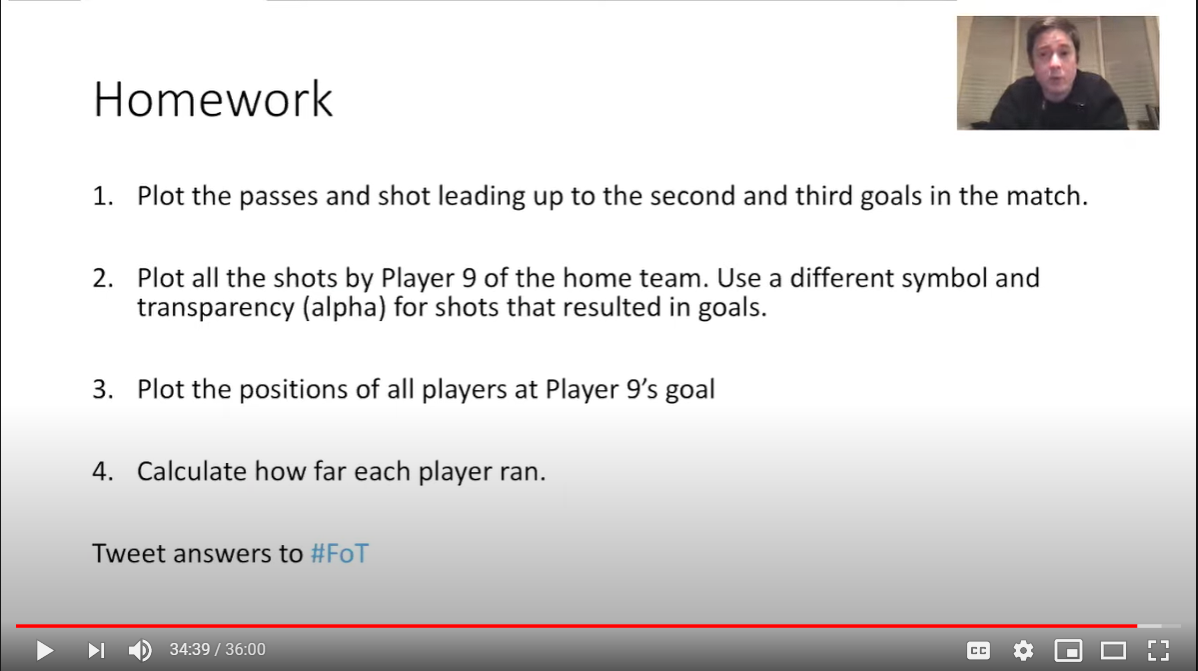

Below I've tried to solve the questions. Please let me know if the code could be improved in any way.

In [123]:
#Importing utility code
import Metrica_IO as mio
import Metrica_Viz as mviz

In [124]:
# set up initial path to data
DATADIR = 'D:/Users/Desktop/Friends of Tracking/Lesson 4/Metrica Data/data'
game_id = 2 # let's look at sample match 2

In [125]:
# read in the event data
events = mio.read_event_data(DATADIR,game_id)

Converting to Metric coordinates

In [126]:
events = mio.to_metric_coordinates(events)

Let's See when the goals happened

In [127]:
events[events['Subtype']=='ON TARGET-GOAL']

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,-40.28,-1.36,-55.12,-2.72
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


# Question 1

## For 2nd Goal

In [128]:
#Finding the start of Pass Sequence that lead up to goal.
i=822
while(events.loc[i]['Type']=='PASS'):
    i=i-1
print(i)

817


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23eccbb1668>)

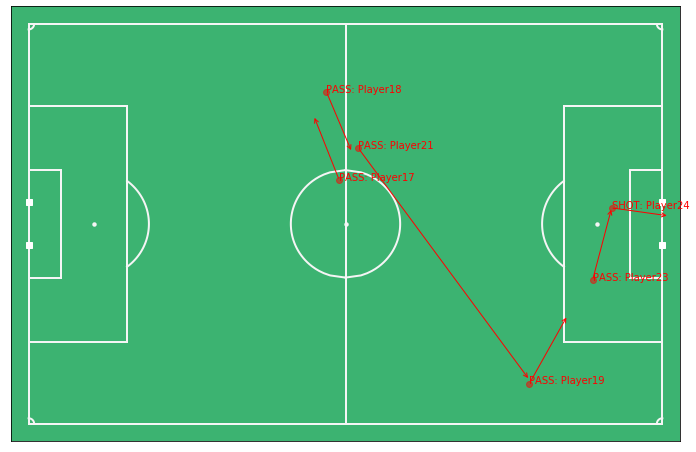

In [129]:
# plot passing move in run up to goal
mviz.plot_events( events.loc[i+1:823], indicators = ['Marker','Arrow'], annotate=True )

## For 3rd Goal

1670


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23eccb1d588>)

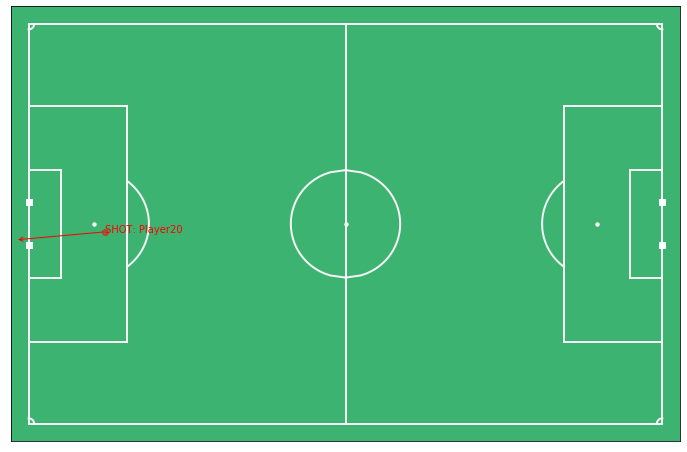

In [130]:
#Finding the start of Pass Sequence that lead up to goal.
i=1670
while(events.loc[i]['Type']=='PASS'):
    i=i-1
print(i)

# plot passing move in run up to goal
mviz.plot_events( events.loc[i+1:1671], indicators = ['Marker','Arrow'], annotate=True )

Welp, the 3rd Goal was a penalty so there are no passes that lead up to it.

# Question 2

In [131]:
home_player9_shots = events[(events['Type']=='SHOT') & (events['Team']=='Home') & (events['From']=='Player9')]

In [132]:
home_player9_shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,47.70,-1.36,54.06,-2.04
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,41.34,-7.48,54.06,5.44
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,45.58,-0.00,55.12,-7.48
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,21.20,-1.36,50.88,-1.36


The goal has a blue color with transparency 1. Moreover, it's denoted by a box.

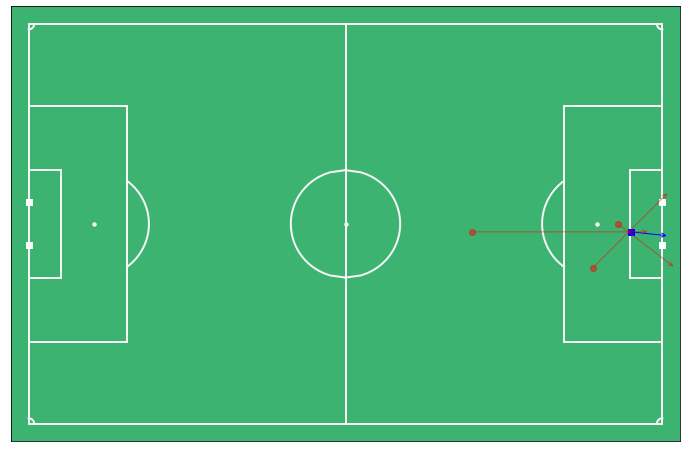

In [133]:
fig,ax = mviz.plot_pitch()
for i in home_player9_shots.index:
    if '-GOAL' in home_player9_shots.loc[i]['Subtype']:
        ax.plot( events.loc[i]['Start X'], events.loc[i]['Start Y'], 'bs' )
        ax.annotate("", xy=events.loc[i][['End X','End Y']], xytext=events.loc[i][['Start X','Start Y']], alpha=1, arrowprops=dict(arrowstyle="->",color='b'),zorder=2)
    else:
        ax.plot( events.loc[i]['Start X'], events.loc[i]['Start Y'], 'ro',alpha=0.5)
        ax.annotate("", xy=events.loc[i][['End X','End Y']], xytext=events.loc[i][['Start X','Start Y']], alpha=0.2, arrowprops=dict(arrowstyle="->",color='r',alpha=0.5))

# Question 3

In [134]:
home_player9_shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,47.70,-1.36,54.06,-2.04
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,41.34,-7.48,54.06,5.44
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,45.58,-0.00,55.12,-7.48
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,21.20,-1.36,50.88,-1.36


In [135]:
goal_index = 1118
goal_frame = 73983

Reading in the tracking data.

In [136]:
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

Reading team: home
Reading team: away


In [137]:
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

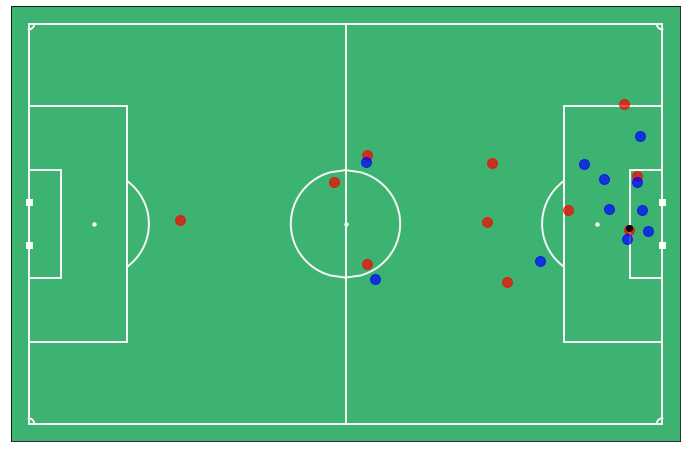

In [138]:
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame] )

# Question 4

In [139]:
tracking_home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
len(tracking_home)

141156

In [141]:
home_1st = tracking_home[tracking_home['Period']==1]
home_2nd = tracking_home[tracking_home['Period']==2]

In [142]:
away_1st = tracking_away[tracking_away['Period']==1]
away_2nd = tracking_away[tracking_away['Period']==2]

In [143]:
home_1st.columns

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')

In [144]:
home_players = set()
away_players = set()
for i in tracking_home.columns:
    if "_" in i and "ball" not in i:
        home_players.add(i[:-2])
for i in tracking_away.columns:
    if '_' in i and "ball" not in i:
        away_players.add(i[:-2])

In [145]:
import numpy as np

In [146]:
home_1st_diff = home_1st.diff()**2
home_1st_dist = {}
for i in home_players:
    dist = np.sqrt(home_1st_diff[i+"_x"] + home_1st_diff[i+"_y"]).sum()
    home_1st_dist[i] = dist
    print(i,dist)

Home_13 0.0
Home_14 0.0
Home_2 5234.367836055602
Home_8 5915.305582064596
Home_11 2730.157719800678
Home_4 5264.5258867943785
Home_3 4943.880553249501
Home_9 4904.2591225167
Home_6 6141.861243872853
Home_10 5052.712382280096
Home_12 0.0
Home_1 5541.165731147004
Home_5 6406.903992475689
Home_7 6004.3955928720525


In [147]:
home_2nd_diff = home_2nd.diff()**2
home_2nd_dist = {}
for i in home_players:
    dist = np.sqrt(home_2nd_diff[i+"_x"] + home_2nd_diff[i+"_y"]).sum()
    home_2nd_dist[i] = dist
    print(i,dist)

Home_13 2395.6893205258693
Home_14 1092.9248875907788
Home_2 4737.72133902686
Home_8 3167.399414816822
Home_11 2519.9733666096117
Home_4 2021.0818466304738
Home_3 4651.922962336163
Home_9 4944.7798443677
Home_6 5448.334659537634
Home_10 4007.913246311054
Home_12 3092.0698001008623
Home_1 4880.147143152079
Home_5 5812.280283362441
Home_7 5281.344775507947


In [148]:
away_1st_diff = away_1st.diff()**2
away_1st_dist = {}
for i in away_players:
    dist = np.sqrt(away_1st_diff[i+"_x"] + away_1st_diff[i+"_y"]).sum()
    away_1st_dist[i] = dist
    print(i,dist)

Away_15 5158.728566729623
Away_18 5433.918520073896
Away_23 5279.59806429418
Away_16 4868.669990824233
Away_19 5828.303846526516
Away_21 5309.478696559477
Away_26 0.0
Away_17 4913.067674262975
Away_25 1729.8325660424232
Away_22 5048.505824477667
Away_24 5428.332503636212
Away_20 5667.043904814538


In [149]:
away_2nd_diff = away_1st.diff()**2
away_2nd_dist = {}
for i in away_players:
    dist = np.sqrt(away_2nd_diff[i+"_x"] + away_2nd_diff[i+"_y"]).sum()
    away_2nd_dist[i] = dist
    print(i,dist)

Away_15 5158.728566729623
Away_18 5433.918520073896
Away_23 5279.59806429418
Away_16 4868.669990824233
Away_19 5828.303846526516
Away_21 5309.478696559477
Away_26 0.0
Away_17 4913.067674262975
Away_25 1729.8325660424232
Away_22 5048.505824477667
Away_24 5428.332503636212
Away_20 5667.043904814538


In [150]:
#Total Distances:
print("HOME PLAYERS DISTANCE COVERED")
for i in home_players:
    print(i,home_1st_dist[i]+home_2nd_dist[i])
print() #Newline
print('AWAY PLAYERS DISTANCE COVERED')
for i in away_players:
    print(i,away_1st_dist[i]+away_2nd_dist[i])

HOME PLAYERS DISTANCE COVERED
Home_13 2395.6893205258693
Home_14 1092.9248875907788
Home_2 9972.089175082463
Home_8 9082.704996881417
Home_11 5250.13108641029
Home_4 7285.607733424852
Home_3 9595.803515585663
Home_9 9849.0389668844
Home_6 11590.195903410488
Home_10 9060.62562859115
Home_12 3092.0698001008623
Home_1 10421.312874299083
Home_5 12219.18427583813
Home_7 11285.74036838

AWAY PLAYERS DISTANCE COVERED
Away_15 10317.457133459246
Away_18 10867.837040147791
Away_23 10559.19612858836
Away_16 9737.339981648465
Away_19 11656.607693053033
Away_21 10618.957393118953
Away_26 0.0
Away_17 9826.13534852595
Away_25 3459.6651320848464
Away_22 10097.011648955335
Away_24 10856.665007272424
Away_20 11334.087809629076
